# 1. Importing Necessary Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns 

# 2. Importing the dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Viewing and Describing the data

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.shape

(200, 5)

In [6]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 4. Analysis Data and further cleaning the data ( if needed ).

In [10]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [11]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [13]:
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# 5. Understanding and Visualizing Data

In [15]:
corr = data.corr()
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


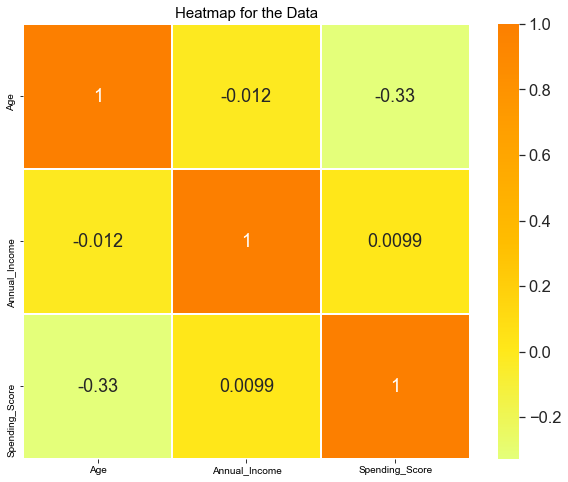

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap="Wistia", annot = True, linewidths=0.5, linecolor='white')
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

# 6. Visualizing Gender Data Visualization.

In [17]:
data['Gender']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [18]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:

data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

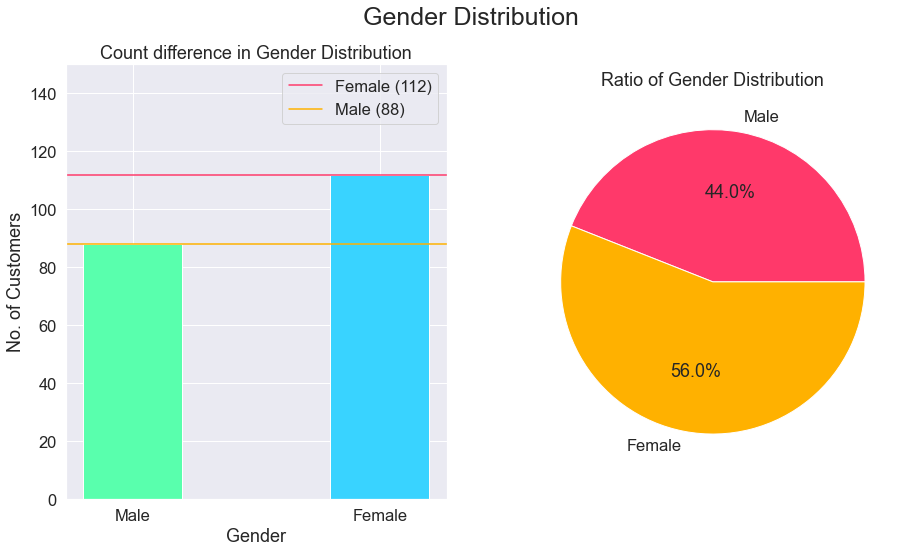

In [20]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#59ffad','#39d3ff'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,150)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#ff396a', linestyle='-', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#ffb100', linestyle='-', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#ff396a','#ffb100'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=25);
plt.show()

# 7. Plotting the Annual Income Column vs the Spending Score

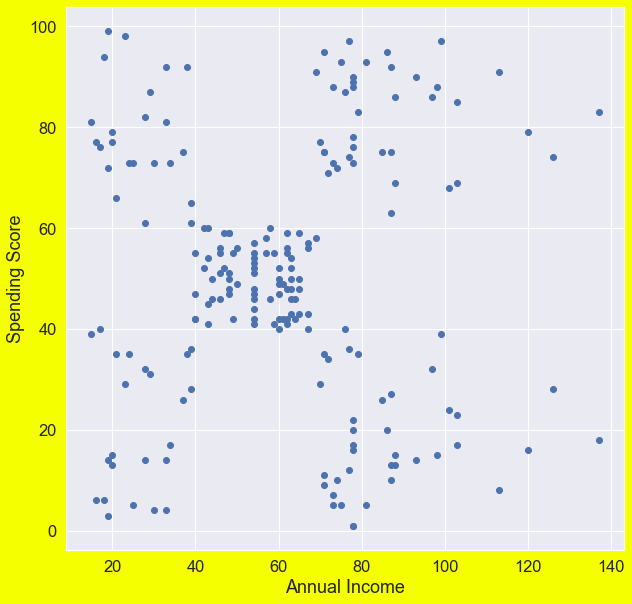

In [21]:
plt.figure(figsize = (10, 10) , facecolor='#f5ff00')
plt.scatter(data["Annual_Income"], data["Spending_Score"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

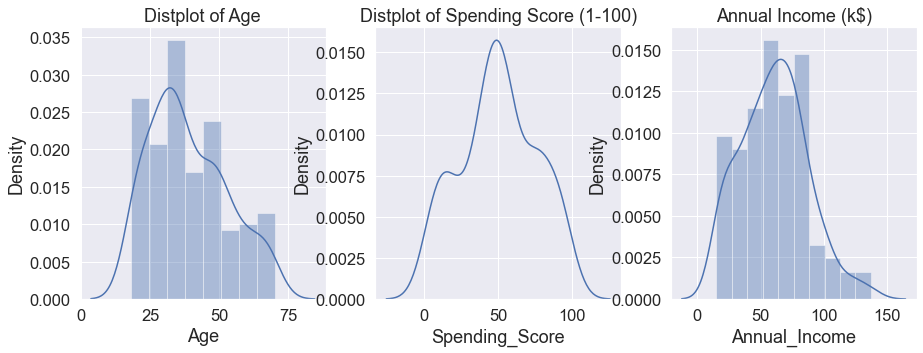

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(data['Spending_Score'],hist=False)
plt.title('Distplot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(data['Annual_Income'])
plt.title('Annual Income (k$)')
plt.show()

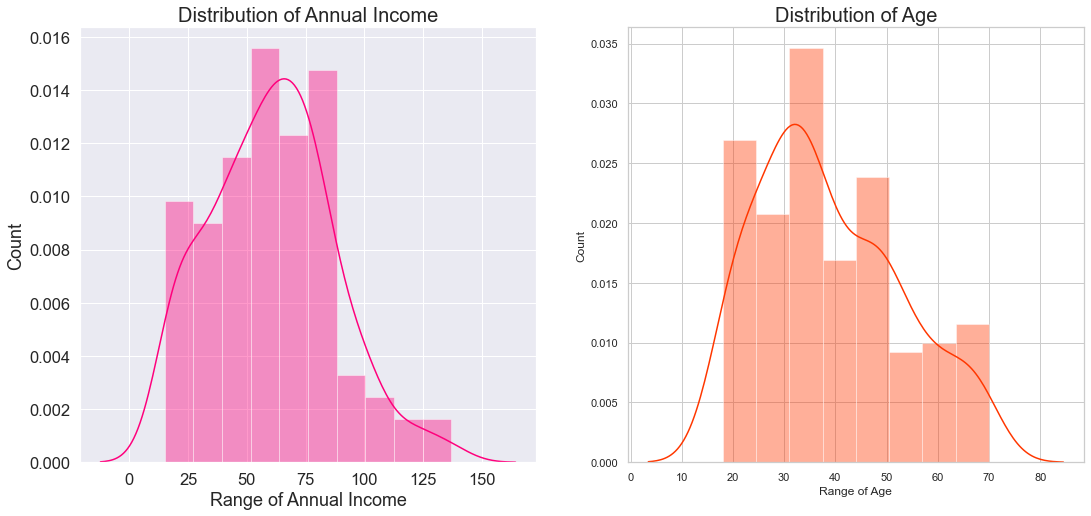

In [23]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual_Income'], color = '#ff007c')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = '#ff3700')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

# 8. Visualizing Gender Data

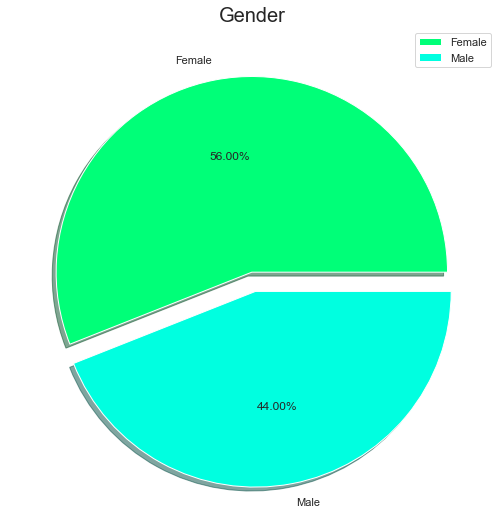

In [24]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['#00ff78', '#00ffe0']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# 9. Visualize the Distribution of Age , Annual Income and Spending Score

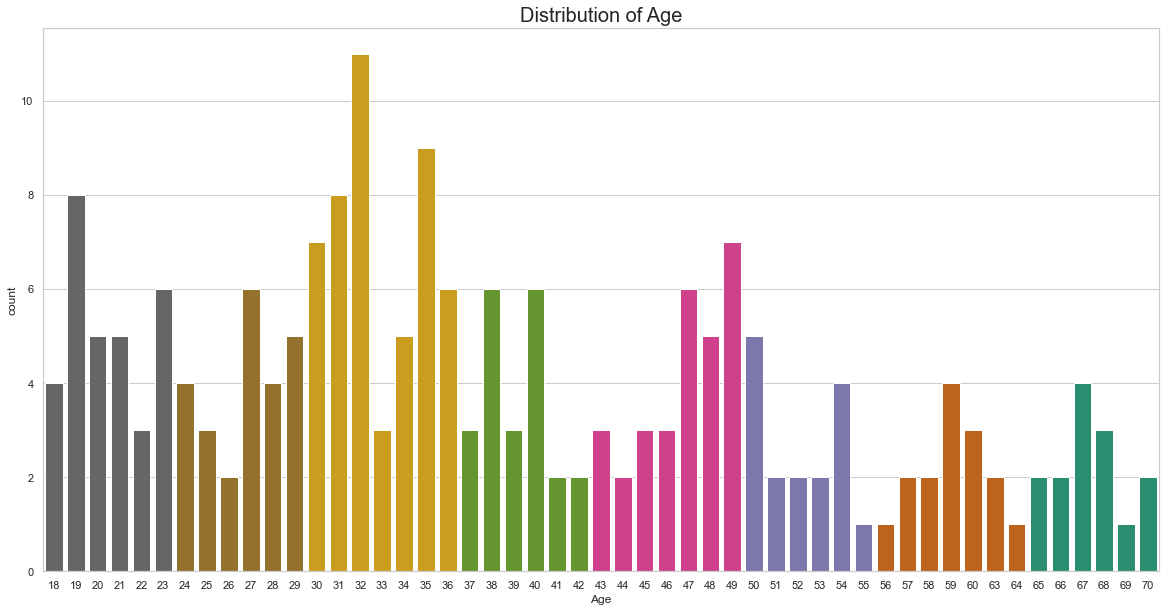

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Age'], palette = 'Dark2_r')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

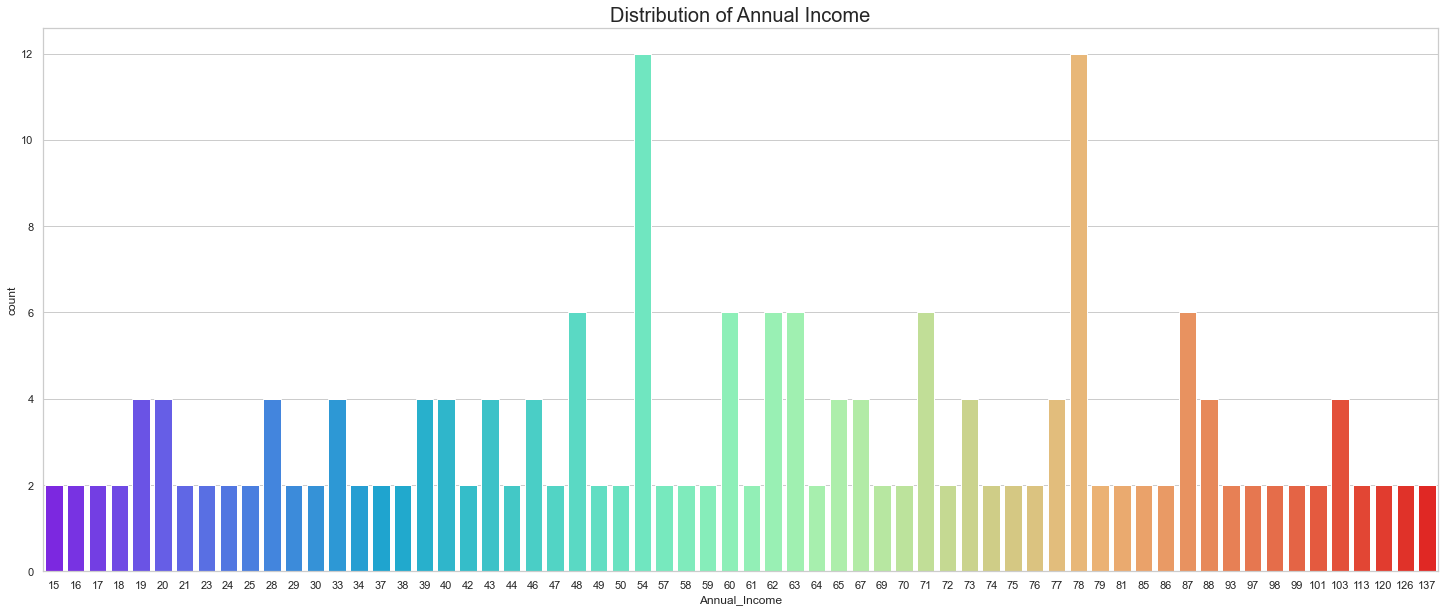

In [26]:
plt.rcParams['figure.figsize'] = (25, 10)
sns.countplot(data['Annual_Income'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

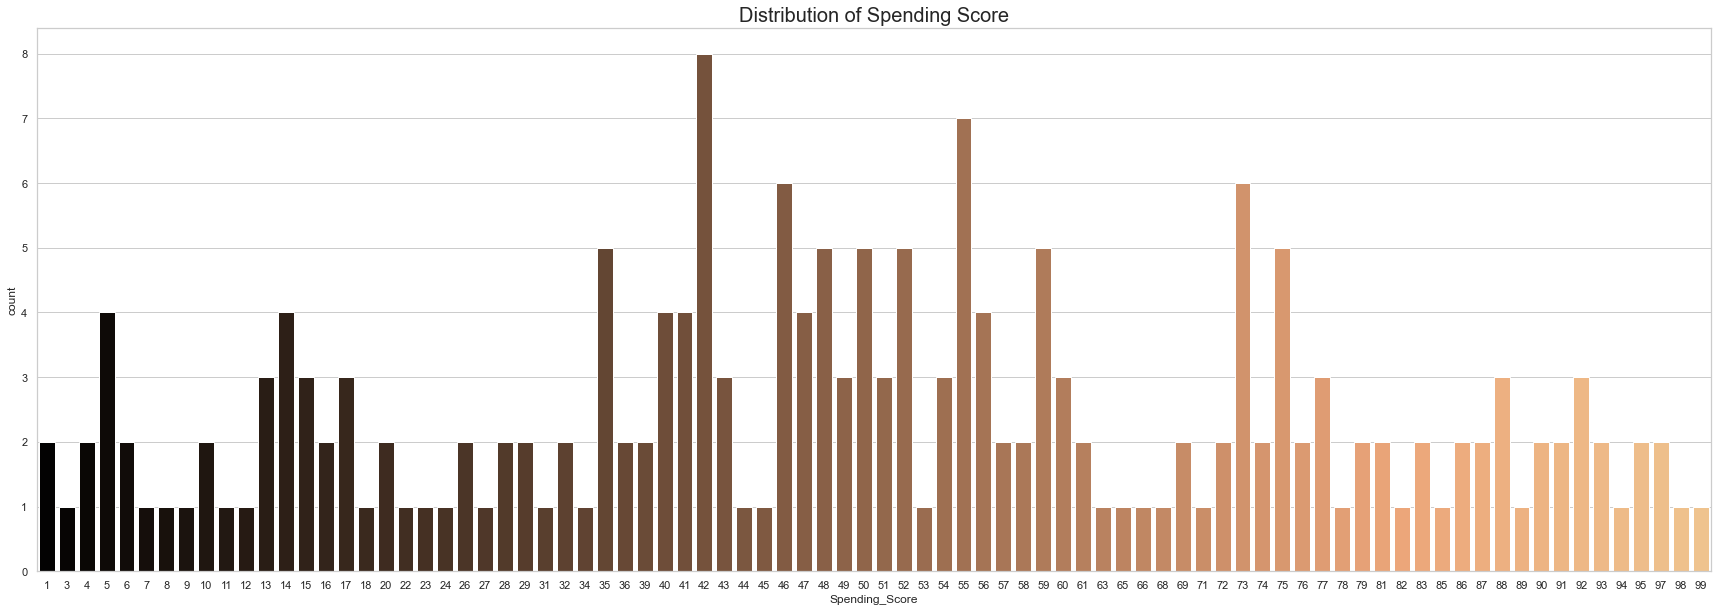

In [27]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(data['Spending_Score'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

# 10. Spending Score of the Customers Visiting the Mall.

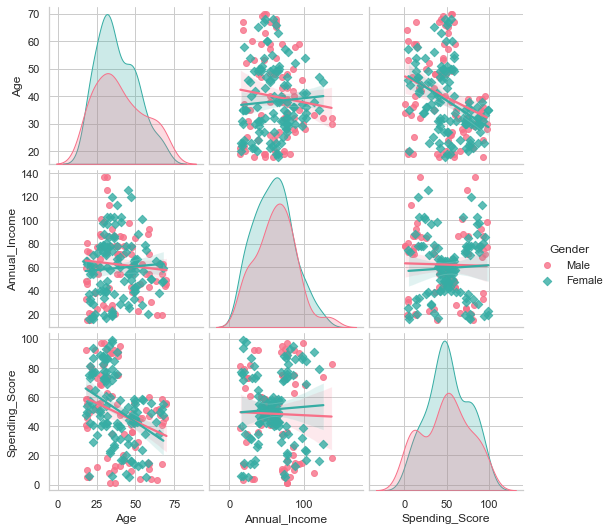

In [28]:
sns.pairplot(data, vars=["Age", "Annual_Income", "Spending_Score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

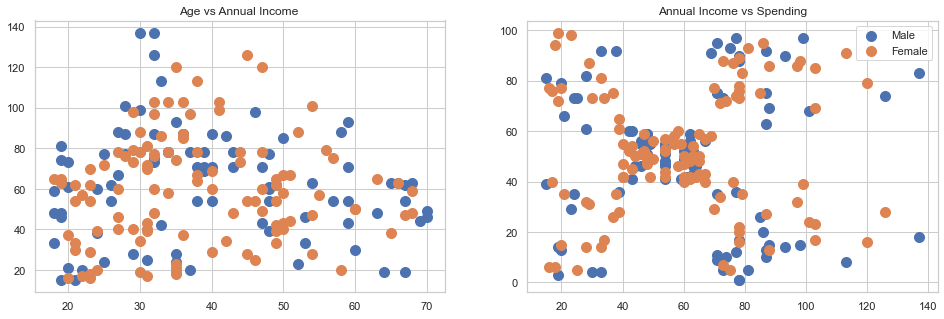

In [29]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual_Income' , data = data[data['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual_Income',y = 'Spending_Score' ,data = data[data['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()

# 10. Visualization Among Gender & Spending score

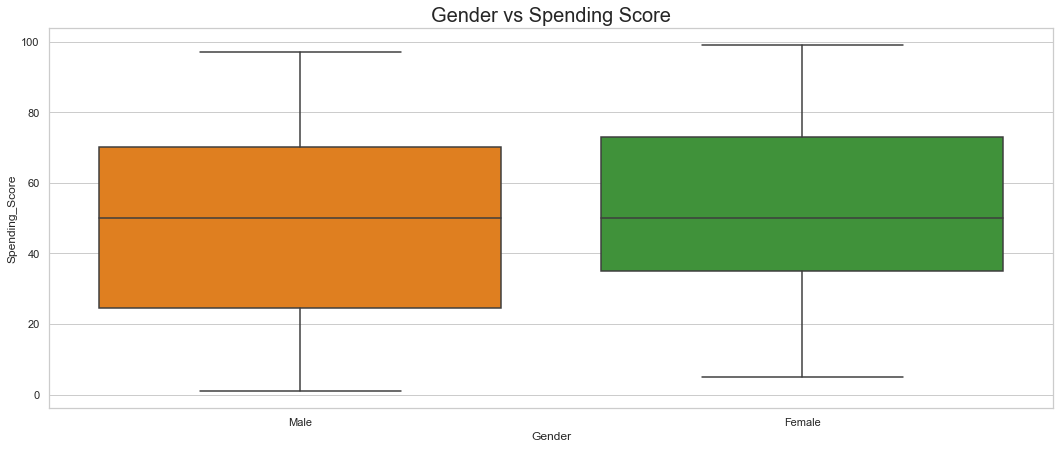

In [30]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(data['Gender'], data['Spending_Score'], palette = 'Paired_r')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

K Means Clustering
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data Labels for the training data (each data point is assigned to a single cluster)

# 11. Selecting Numbers of Clusters

In [43]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37265.86520484,  30241.34361794,  25012.91706989,
        21932.39204424,  19646.48201895,  17518.64345657,  16381.0150871 ,
        14320.91818234,  13192.9830941 ,  12211.26840513,  11122.20181256,
        10137.37841072,   9732.15192527,   8588.47010747,   7949.68709957,
         7837.78659919,   7134.91240321,   6891.72057387,   6243.590608  ,
         6118.53052503,   5746.98257576,   5466.68669737,   5135.05481283,
         4895.67574648])

Inertia can be recognized as a measure of how internally coherent clusters are.

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

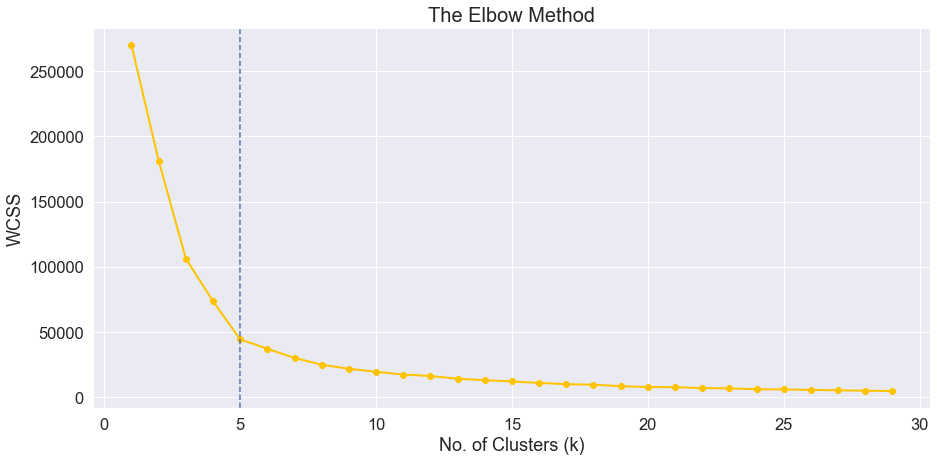

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="#ffc300", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

# 12. Model Building 

Feature Selection for Model Building Purposes

First we need to check the data for any missing values as it can ruin our model.

In [37]:
data.isna().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [38]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [39]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


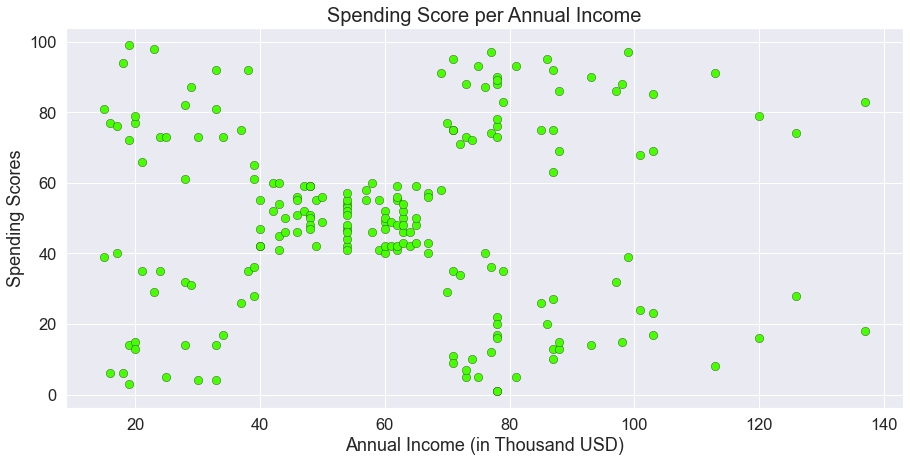

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#47ff00', 
                     edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

# 13. Clustering

In [48]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

In [119]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0


In [120]:
kms.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

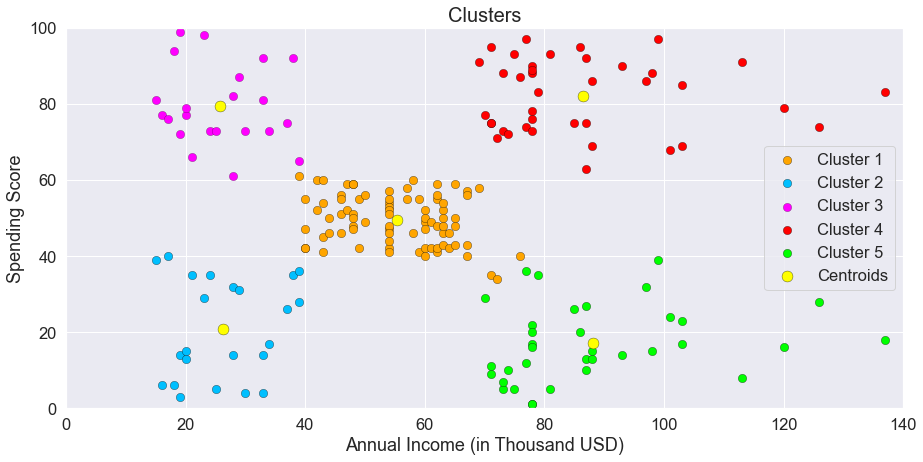

In [121]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

# Clustering - Observation

a. High Income, High Spending Score (Cluster 4) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

b. High Income, Low Spending Score (Cluster 2) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

c. Average Income, Average Spending Score (Cluster 5) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Cluster 1) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Cluster 3) - Don't target these customers since they have less income and need to save money.